<a href="https://colab.research.google.com/github/nicobotti91/coderds/blob/main/etapas_basicas_dsii_botti_1er_entrega_testDSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentación del proyecto**




**Abstracto con Motivación y Audiencia**

Motivación del proyecto: Optimizar las estrategias comerciales y de marketing

*   Tomar decisiones estratégicas informadas sobre productos, precios, promociones y gestión de inventario.
*   Encontrar habitos de compra
*   Comprender mejor el comportamiento y las preferencias de los clientes para personalizar las estrategias de marketing y mejorar la experiencia del cliente.
*   Identificar oportunidades de crecimiento y áreas de mejora en las operaciones comerciales.


Audiencia: Gerentes de departamentos de negocio, marketing y compras.

**Contexto Comercial y Analítico**

**Preguntas/Hipótesis a Resolver mediante el Análisis de Datos**

---

**Características de los clientes:** ¿Cuál es la distribución demográfica de los clientes (edad, género, ingresos)? ¿Cómo se distribuyen geográficamente los clientes? ¿Cuáles son los principales segmentos de clientes?

**Patrones de compra:** ¿Cuáles son los productos más vendidos y las categorías de productos más populares? ¿Cuáles son las marcas con mejor desempeño? ¿Hay patrones estacionales o temporales en las ventas? ¿Cuál es el valor promedio de las transacciones?

**Comportamiento del cliente:** ¿Cuántas compras realiza un cliente promedio? ¿Cuál es el gasto total por cliente? ¿Cómo varía el comportamiento de compra entre los diferentes segmentos de clientes?

**Feedback y satisfacción del cliente**: ¿Cuál es la distribución de los ratings y
feedback de los productos/transacciones? ¿Hay alguna correlación entre el feedback y otras variables (por ejemplo, categoría de producto, marca)?

**Eficiencia operativa**: ¿Cuáles son los métodos de envío y pago más utilizados? ¿Cuál es el estado típico de las órdenes?

**Objetivo**

# **Lectura de datos**

**Librerias necesarias para el analisis de datos**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Configuración del entorno de Python en Google Colab**

**Lectura del dataset**

In [2]:
#Lectura del dataset formato csv de "orders"
df_orders = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/orders.csv')

In [3]:
#Lectura del dataset formato csv de "order items"
df_order_items = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/order_items.csv')

In [4]:
#Lectura del dataset formato csv de "products"
df_products = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/products.csv')

In [5]:
#Lectura del dataset formato csv de "sellers"
df_sellers = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/sellers.csv')

In [6]:
#Lectura del dataset formato csv de "geolocation" --> Data set muy pesado, me consume toda la ram por lo que se analizará en caso de ser necesario por separado
df_geolocation = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/geolocation.csv').drop_duplicates()

In [7]:
#Lectura del dataset formato csv de "payments"
df_payments = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/payments.csv')

In [8]:
#Lectura del dataset formato csv de "customers"
df_customers = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/customers.csv')

In [9]:
# Merge de los dataset "orders" y "order items"
df_merged_v1 =  df_orders.merge(
    df_order_items,
    how ='inner',
    on= 'order_id'
)

In [10]:
# Merge del dataset anteriormente mergeado con dataset "products"
df_merged_v2 =  df_merged_v1.merge(
    df_products,
    how ='inner',
    on= 'product_id'
)

In [11]:
# Merge del dataset anteriormente mergeado con dataset "sellers"
df_merged_v3 =  df_merged_v2.merge(
    df_sellers,
    how ='inner',
    on= 'seller_id'
)


In [12]:
# Merge del dataset anteriormente mergeado con dataset "payments"
df_merged_v4 =  df_merged_v3.merge(
    df_payments,
    how ='inner',
    on= 'order_id'
)

In [13]:
# Merge del dataset anteriormente mergeado con dataset "customers" dando como resultado el df final
df_merged_total = df_merged_v4.merge(
    df_customers,
    how ='inner',
    on= 'customer_id'
)
df_merged_total.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,belo horizonte,SP,1,UPI,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,guariba,SP,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


**Análisis inicial del dataset**

In [14]:
# tamaño del Dataframe
df_merged_total.shape

(117601, 33)

In [15]:
# Miramos con info las distintas columnas, la cantidad de valores no nulos y el formato que tiene cada una
df_merged_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   customer_id                    117601 non-null  object 
 2   order_status                   117601 non-null  object 
 3   order_purchase_timestamp       117601 non-null  object 
 4   order_approved_at              117586 non-null  object 
 5   order_delivered_carrier_date   116356 non-null  object 
 6   order_delivered_customer_date  115034 non-null  object 
 7   order_estimated_delivery_date  117601 non-null  object 
 8   order_item_id                  117601 non-null  int64  
 9   product_id                     117601 non-null  object 
 10  seller_id                      117601 non-null  object 
 11  shipping_limit_date            117601 non-null  object 
 12  price                         

El dataset se compone de 33 columnas y 117,6k filas

*   Se detecta que las columnas relacionadas a fechas está en formato "object", habrá que pasarlas a datetime

In [ ]:
# Miramos con describe la cantidad de valores, la media, min, máx y los quartiles
df_original.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,3.016770e+05,301702.000000,3.016480e+05,301670.000000,301837.000000,301660.000000,301649.000000,301653.000000,301660.000000,301826.000000
mean,5.495823e+06,55006.553934,5.501464e+09,50298.951019,35.481326,2023.165113,5.359729,255.163659,1367.651156,3.162670
std,2.595565e+06,26005.675200,2.596017e+09,28972.807134,15.021933,0.371283,2.868575,141.389640,1128.998515,1.320827
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.247930e+06,32469.250000,3.255061e+09,25425.000000,22.000000,2023.000000,3.000000,132.890764,438.724278,2.000000
50%,5.499657e+06,55012.000000,5.505812e+09,50602.500000,32.000000,2023.000000,5.000000,255.470969,1041.117547,3.000000
75%,7.739509e+06,77511.000000,7.749860e+09,75252.000000,46.000000,2023.000000,8.000000,377.672606,2029.999853,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.997911,4999.625796,5.000000


Las columnas Transaction_ID, Customer_ID, Phone, ZipCode y Year no tiene sentido analizarlas en el describe ya que son categóricas nominales (salvo Year que es categórica ordinal)

In [16]:
# Revisamos primeras 5 filas del DF
df_merged_total.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,belo horizonte,SP,1,UPI,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,guariba,SP,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [18]:
# Revisamos últimas 5 filas del DF
df_merged_total.tail(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
117596,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,tupa,SP,1,credit_card,3,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
117597,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,...,sao paulo,SP,1,credit_card,5,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
117598,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,ilicinea,MG,1,credit_card,4,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ
117599,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,ilicinea,MG,1,credit_card,4,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ
117600,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,1,006619bbed68b000c8ba3f8725d5409e,...,franca,SP,1,debit_card,1,86.86,60350aa974b26ff12caad89e55993bd6,83750,lapa,PR


**Descripción de variables**

In [19]:
#definimos una variable el diccionario de variables que tenemos en el DataFrame
ref_variables_dict = {
    'order_id': {'Descripción': 'Identificador único del pedido.', 'Tipo': 'Categórica nominal'},
    'customer_id': {'Descripción': 'Identificador único del cliente para cada pedido.', 'Tipo': 'Categórica nominal'},
    'order_status': {'Descripción': 'Estado del pedido.', 'Tipo': 'Categórica nominal'},
    'order_purchase_timestamp': {'Descripción': 'Marca de tiempo de la compra del pedido.', 'Tipo': 'Categórica ordinal (fecha y hora)'},
    'order_approved_at': {'Descripción': 'Marca de tiempo de la aprobación del pago del pedido.', 'Tipo': 'Categórica ordinal (fecha y hora)'},
    'order_delivered_carrier_date': {'Descripción': 'Marca de tiempo de la publicación del pedido por el transportista.', 'Tipo': 'Categórica ordinal (fecha y hora)'},
    'order_delivered_customer_date': {'Descripción': 'Marca de tiempo de la entrega real del pedido al cliente.', 'Tipo': 'Categórica ordinal (fecha y hora)'},
    'order_estimated_delivery_date': {'Descripción': 'Fecha de entrega estimada original que se le dio al cliente.', 'Tipo': 'Categórica ordinal (fecha)'},
    'order_item_id': {'Descripción': 'Identificador secuencial del número de artículo debajo del mismo pedido.', 'Tipo': 'Numérica discreta'},
    'product_id': {'Descripción': 'Identificador único del producto.', 'Tipo': 'Categórica nominal'},
    'seller_id': {'Descripción': 'Identificador único del vendedor.', 'Tipo': 'Categórica nominal'},
    'shipping_limit_date': {'Descripción': 'Fecha límite de envío del vendedor para manejar el pedido.', 'Tipo': 'Categórica ordinal (fecha y hora)'},
    'price': {'Descripción': 'Precio del artículo.', 'Tipo': 'Numérica continua'},
    'freight_value': {'Descripción': 'Valor del flete del artículo.', 'Tipo': 'Numérica continua'},
    'product category': {'Descripción': 'Categoría del producto.', 'Tipo': 'Categórica nominal'},
    'product_name_length': {'Descripción': 'Número de caracteres en el nombre del producto.', 'Tipo': 'Numérica discreta'},
    'product_description_length': {'Descripción': 'Número de caracteres en la descripción del producto.', 'Tipo': 'Numérica discreta'},
    'product_photos_qty': {'Descripción': 'Número de fotos de productos publicadas.', 'Tipo': 'Numérica discreta'},
    'product_weight_g': {'Descripción': 'Peso del producto en gramos.', 'Tipo': 'Numérica continua'},
    'product_length_cm': {'Descripción': 'Longitud del producto en centímetros.', 'Tipo': 'Numérica continua'},
    'product_height_cm': {'Descripción': 'Altura del producto en centímetros.', 'Tipo': 'Numérica continua'},
    'product_width_cm': {'Descripción': 'Ancho del producto en centímetros.', 'Tipo': 'Numérica continua'},
    'seller_zip_code_prefix': {'Descripción': 'Primeros 5 dígitos del código postal del vendedor.', 'Tipo': 'Categórica nominal'},
    'seller_city': {'Descripción': 'Ciudad del vendedor.', 'Tipo': 'Categórica nominal'},
    'seller_state': {'Descripción': 'Estado del vendedor.', 'Tipo': 'Categórica nominal'},
    'payment_sequential': {'Descripción': 'Un cliente puede pagar un pedido con más de un método de pago. Si lo hace, se crea una secuencia para acompañar los diferentes pagos.', 'Tipo': 'Numérica discreta'},
    'payment_type': {'Descripción': 'Método de pago elegido por el cliente.', 'Tipo': 'Categórica nominal'},
    'payment_installments': {'Descripción': 'Número de cuotas utilizadas para el pago.', 'Tipo': 'Numérica discreta'},
    'payment_value': {'Descripción': 'Valor de la transacción del método de pago.', 'Tipo': 'Numérica continua'},
    'customer_unique_id': {'Descripción': 'Identificador único de un cliente (un cliente puede tener múltiples customer_id si compró como invitado).', 'Tipo': 'Categórica nominal'},
    'customer_zip_code_prefix': {'Descripción': 'Primeros 5 dígitos del código postal del cliente.', 'Tipo': 'Categórica nominal'},
    'customer_city': {'Descripción': 'Ciudad del cliente.', 'Tipo': 'Categórica nominal'},
    'customer_state': {'Descripción': 'Estado del cliente.', 'Tipo': 'Categórica nominal'}
}

ref_variables = pd.DataFrame.from_dict(ref_variables_dict, orient='index')
ref_variables.index.name = 'Variable'

display(ref_variables.reset_index())

,Variable,Descripción,Tipo
0,order_id,Identificador único del pedido.,Categórica nominal
1,customer_id,Identificador único del cliente para cada pedido.,Categórica nominal
2,order_status,Estado del pedido.,Categórica nominal
3,order_purchase_timestamp,Marca de tiempo de la compra del pedido.,Categórica ordinal (fecha y hora)
4,order_approved_at,Marca de tiempo de la aprobación del pago del ...,Categórica ordinal (fecha y hora)
5,order_delivered_carrier_date,Marca de tiempo de la publicación del pedido p...,Categórica ordinal (fecha y hora)
6,order_delivered_customer_date,Marca de tiempo de la entrega real del pedido ...,Categórica ordinal (fecha y hora)
7,order_estimated_delivery_date,Fecha de entrega estimada original que se le d...,Categórica ordinal (fecha)
8,order_item_id,Identificador secuencial del número de artícul...,Numérica discreta
9,product_id,Identificador único del producto.,Categórica nominal


In [20]:
# Analizar los valores de las variables object
df_merged_total.select_dtypes(include=['object']).apply(pd.unique)

,0
order_id,"[e481f51cbdc54678b7cc49136f2d6af7, 53cdb2fc8bc..."
customer_id,"[9ef432eb6251297304e76186b10a928d, b0830fb4747..."
order_status,"[delivered, invoiced, shipped, processing, can..."
order_purchase_timestamp,"[2017-10-02 10:56:33, 2018-07-24 20:41:37, 201..."
order_approved_at,"[2017-10-02 11:07:15, 2018-07-26 03:24:27, 201..."
order_delivered_carrier_date,"[2017-10-04 19:55:00, 2018-07-26 14:31:00, 201..."
order_delivered_customer_date,"[2017-10-10 21:25:13, 2018-08-07 15:27:45, 201..."
order_estimated_delivery_date,"[2017-10-18 00:00:00, 2018-08-13 00:00:00, 201..."
product_id,"[87285b34884572647811a353c7ac498a, 595fac2a385..."
seller_id,"[3504c0cb71d7fa48d967e0e4c94d59d9, 289cdb325fb..."


# **Data Wrangling - Limpieza y transformación de datos**

**Valores duplicados**

In [21]:
# Idetnificar cuantas filas están duplicadas
df_merged_total.duplicated().sum()

np.int64(0)

No se detectan duplicados

**Valores nulos**

In [22]:
# Identificar cuantos valores nulos hay por columna
df_merged_total.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,15
order_delivered_carrier_date,1245
order_delivered_customer_date,2567
order_estimated_delivery_date,0
order_item_id,0
product_id,0


In [24]:
# Calculo que % de valores nulos representa sobre el total de cada variable
nulos_por_variable = df_merged_total.isnull()
cantidad_nulos_por_variable = nulos_por_variable.sum() # Sumamos los valores booleanos para obtener la cantidad de nulos por variable
variables_con_nulos = cantidad_nulos_por_variable[cantidad_nulos_por_variable > 0] # Filtramos solo las variables con al menos un valor nulo
lista_variables_con_nulos = variables_con_nulos.index.tolist() # Convertimos a lista

for variable in lista_variables_con_nulos:
    cantidad_nulos = cantidad_nulos_por_variable[variable]
    porcentaje_nulos = (cantidad_nulos / len(df_merged_total)) * 100
    print(f"Variable: {variable}, Cantidad de Nulos: {cantidad_nulos}, Porcentaje: {porcentaje_nulos:.2f}%")

Variable: order_approved_at, Cantidad de Nulos: 15, Porcentaje: 0.01%
Variable: order_delivered_carrier_date, Cantidad de Nulos: 1245, Porcentaje: 1.06%
Variable: order_delivered_customer_date, Cantidad de Nulos: 2567, Porcentaje: 2.18%
Variable: product category, Cantidad de Nulos: 1698, Porcentaje: 1.44%
Variable: product_name_length, Cantidad de Nulos: 1698, Porcentaje: 1.44%
Variable: product_description_length, Cantidad de Nulos: 1698, Porcentaje: 1.44%
Variable: product_photos_qty, Cantidad de Nulos: 1698, Porcentaje: 1.44%
Variable: product_weight_g, Cantidad de Nulos: 20, Porcentaje: 0.02%
Variable: product_length_cm, Cantidad de Nulos: 20, Porcentaje: 0.02%
Variable: product_height_cm, Cantidad de Nulos: 20, Porcentaje: 0.02%
Variable: product_width_cm, Cantidad de Nulos: 20, Porcentaje: 0.02%


Observamos que el % de valores nulos por varialbe es muy bajo, la que tiene mayor valores nulos es nombre con 2567 que representa solo un 2,18% del total

In [26]:
#guardamos en un dataFrame el dataframe original filtrado por los que tienen el "order_delivered_customer_date" nulo
df_order_delivered_null = df_merged_total[df_merged_total['order_delivered_customer_date'].isnull()]

In [35]:
# hacemos un groupby para detectar si es que algún status de orden en particular no tiene este campo informado
df_order_delivered_null.groupby('order_status')['order_status'].count().reset_index(name='count')

,order_status,count
0,approved,3
1,canceled,559
2,delivered,8
3,invoiced,371
4,processing,375
5,shipped,1244
6,unavailable,7


Hay distintos status por lo que el hecho que no esté informado este campo no está relacionado con el status

In [43]:
# hacemos un groupby para detectar si es que algún seller en particular no tiene este campo informado
df_order_delivered_null.groupby('seller_id')['order_status'].count().reset_index(name='count')

,seller_id,count
0,001cca7ae9ae17fb1caed9dfb1094831,5
1,001e6ad469a905060d959994f1b41e4f,1
2,002100f778ceb8431b7a1020ff7ab48f,1
3,004c9cd9d87a3c30c522c48c4fc07416,3
4,0176f73cc1195f367f7b32db1e5b3aa8,1
...,...,...
917,ffa6adafb71b807dc13159e26431354c,1
918,ffc470761de7d0232558ba5e786e57b7,1
919,ffcfefa19b08742c5d315f2791395ee5,1
920,fffd5413c0700ac820c7069d66d98c89,3


In [38]:
#guardamos en un dataFrame el dataframe original filtrado por los que tienen el "product category" nulo
df_product_category_null = df_merged_total[df_merged_total['product category'].isnull()]

In [41]:
# hacemos un groupby para detectar si es algún producto en concreto que no tiene informado el product category
df_product_category_null.groupby(['product_length_cm','product_weight_g','product_height_cm'])['order_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)

,product_length_cm,product_weight_g,product_height_cm,count
137,20.0,400.0,12.0,197
17,16.0,200.0,2.0,71
39,16.0,350.0,4.0,49
51,16.0,450.0,7.0,33
57,16.0,550.0,7.0,32
...,...,...,...,...
3,16.0,100.0,3.0,1
489,80.0,16000.0,60.0,1
13,16.0,150.0,12.0,1
9,16.0,115.0,13.0,1


📒Vemos que tanto el product category como el order_delivered_customer_date tienen nulos de forma aleatoria por lo que al representar un % bajo del DataFrame total conviene eliminar las filas nulas.

In [44]:
# Eliminar las filas con valores nulos
df_merged_total = df_merged_total.dropna()

**Tratamiento de valores outliers**

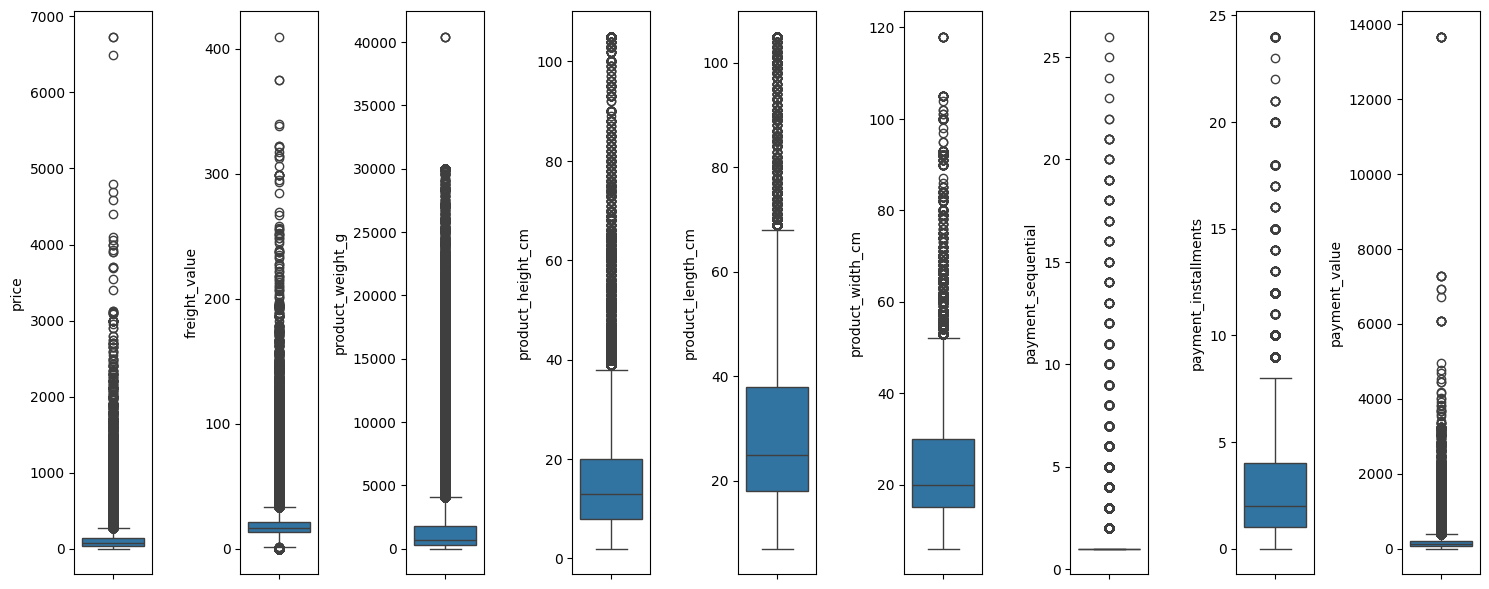

In [47]:
variables = ['price', 'freight_value', 'product_weight_g', 'product_height_cm', 'product_length_cm', 'product_width_cm', 'payment_sequential','payment_installments', 'payment_value']

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df_merged_total, ax=ax)
plt.tight_layout()

In [ ]:
# Generación del DF con outliers para análisis basandonos en el rango intercuartil
Q1 = df_original['Total_Amount'].quantile(0.25)
Q3 = df_original['Total_Amount'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_original_outliers = df_original[(df_original['Total_Amount'] <= limite_inferior) | (df_original['Total_Amount'] >= limite_superior)]
df_original_outliers



,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
150,4613625.0,72950.0,Gregory Bates,Gerald65@gmail.com,7.785500e+09,3720 Matthew Ville Suite 453,Portsmouth,England,42573.0,UK,...,4885.287161,Electronics,Samsung,Television,Average,Same-Day,Debit Card,Pending,2.0,Android TV
159,8093529.0,45413.0,Lauren Johnson,Lisa82@gmail.com,1.816017e+09,0288 Jennifer Spurs Suite 207,Portsmouth,England,24786.0,UK,...,4850.773617,Books,Penguin Books,Children's,Bad,Standard,Debit Card,Delivered,1.0,Art supplies
395,5777205.0,20280.0,Patrick Joseph,Mary8@gmail.com,5.713763e+09,5914 Vargas Loop Apt. 416,Portsmouth,England,4681.0,UK,...,4487.127690,Clothing,Zara,Jeans,Average,Same-Day,Debit Card,Delivered,2.0,Distressed jeans
400,4669285.0,64275.0,Mrs. Taylor Dixon,Alexandra85@gmail.com,4.173398e+09,7386 Delacruz Lock,Portsmouth,England,47009.0,UK,...,4518.677874,Grocery,Pepsi,Juice,Good,Standard,Credit Card,Processing,3.0,Grapefruit juice
484,9627400.0,97549.0,Brady Stanley,Jordan16@gmail.com,6.532213e+09,9574 Heath Points Apt. 765,Portsmouth,England,10616.0,UK,...,4755.346608,Books,Penguin Books,Non-Fiction,Bad,Same-Day,Cash,Delivered,1.0,History
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301721,5518811.0,61956.0,Elizabeth Gaines,Bradley4@gmail.com,4.366713e+09,44193 Shane Field,Liverpool,England,24996.0,UK,...,4640.315599,Clothing,Adidas,Jacket,Bad,Standard,Cash,Pending,1.0,Blazer
301723,7612722.0,91060.0,Michael Sherman,Zoe36@gmail.com,3.115345e+09,923 Eric Mission Apt. 706,Berlin,Berlin,96496.0,Germany,...,4773.836796,Grocery,Coca-Cola,Water,Average,Same-Day,Cash,Pending,2.0,Mineral water
301766,2173333.0,31082.0,Mr. Martin Williams,Karen4@gmail.com,1.097862e+09,95272 Castillo Islands,Plymouth,England,86920.0,UK,...,4802.759630,Home Decor,IKEA,Lighting,Excellent,Same-Day,Cash,Pending,5.0,Floor lamps
301904,8626872.0,62191.0,Chad Stewart,Jesus15@gmail.com,5.251720e+09,5608 Ariana Roads,Southampton,England,30775.0,UK,...,4884.033570,Home Decor,Bed Bath & Beyond,Bedding,Average,Standard,Cash,Delivered,2.0,Comforter


In [ ]:
df_original[(df_original['Product_Brand'] == 'Adidas') & (df_original['products'] == 'Blazer')]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
218,6532646.0,22191.0,Jose Diaz,Julian98@gmail.com,7.905836e+09,6902 Nancy Crossing Suite 179,Portsmouth,England,89921.0,UK,...,1641.687860,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Blazer
239,9858337.0,29333.0,Justin Jackson,Barbara12@gmail.com,4.423586e+09,042 Katie Underpass Suite 931,Portsmouth,England,56061.0,UK,...,147.158287,Clothing,Adidas,Jacket,Good,Same-Day,Credit Card,Delivered,3.0,Blazer
289,3258024.0,92619.0,Alex Medina,John85@gmail.com,6.735971e+09,608 Burton Spurs Apt. 380,Portsmouth,England,39599.0,UK,...,1555.387334,Clothing,Adidas,Jacket,Good,Same-Day,Credit Card,Shipped,3.0,Blazer
644,5799442.0,47157.0,Vincent Smith,Jeremy90@gmail.com,1.891228e+09,0450 Sarah Lake Apt. 764,Portsmouth,England,89727.0,UK,...,291.715955,Clothing,Adidas,Jacket,Bad,Express,Debit Card,Delivered,1.0,Blazer
1497,5969211.0,43372.0,Steven Berg,Michael51@gmail.com,7.883380e+09,925 Mark Mall Apt. 430,Portsmouth,England,31849.0,UK,...,770.642065,Clothing,Adidas,Jacket,Bad,Standard,PayPal,Pending,1.0,Blazer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299999,4229614.0,45975.0,Thomas Whitaker,Latoya72@gmail.com,2.081974e+09,45499 Barrera Square,Leicester,England,9796.0,UK,...,2234.035659,Clothing,Adidas,Jacket,Good,Express,Credit Card,Delivered,3.0,Blazer
300479,1985547.0,98306.0,Scott Harris,Raymond2@gmail.com,1.500414e+09,127 Joseph Ports Apt. 024,Newcastle,New South Wales,73848.0,Australia,...,1159.735704,Clothing,Adidas,Jacket,Average,Same-Day,Credit Card,Processing,2.0,Blazer
300499,4242792.0,88699.0,Kristen Williams,Paula4@gmail.com,4.318336e+09,586 Perez Lodge,Chicago,Maryland,20967.0,USA,...,3604.029773,Clothing,Adidas,Jacket,Bad,Standard,Credit Card,Delivered,1.0,Blazer
300526,2680462.0,50621.0,Jennifer Townsend,Dana59@gmail.com,9.319438e+09,05798 Parker Common,Geelong,New South Wales,84015.0,Australia,...,1636.477650,Clothing,Adidas,Jacket,Average,Same-Day,Credit Card,Shipped,2.0,Blazer


**Otras transformaciones, normalización, fechas**

# **Análisis Exploratorio de datos**

**Análisis univariado**

**Análisis bivariado**

**Análisis multivariado**

**Conclusiones del EDA**

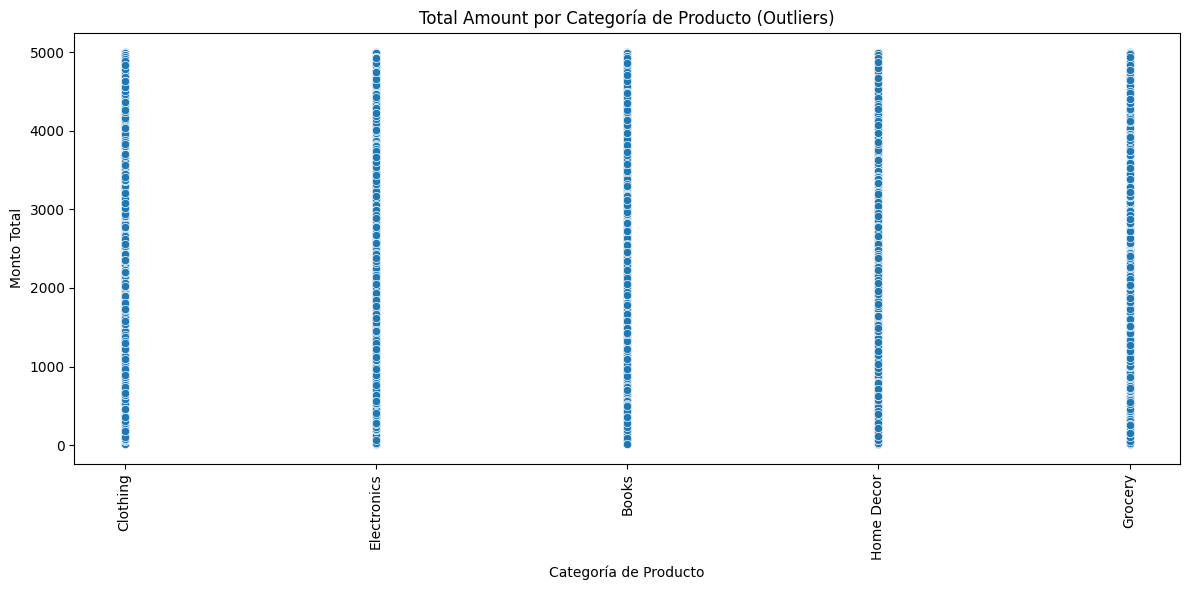

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6)) # Ajusta el tamaño de la figura si es necesario
sns.scatterplot(data=df_original, x='Product_Category', y='Total_Amount')

# Rotar las etiquetas del eje x para mejor legibilidad si hay muchas categorías
plt.xticks(rotation=90)

plt.title('Total Amount por Categoría de Producto (Outliers)')
plt.xlabel('Categoría de Producto')
plt.ylabel('Monto Total')

plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se corten
plt.show()